In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

categorial_variable = ["임대건물구분", "지역", "공급유형", "자격유형"]
continious_variable = ["총세대수", "전용면적", "전용면적별세대수", "공가수", "임대보증금", "임대료",
                      "도보 10분거리 내 지하철역 수(환승노선 수 반영)", "도보 10분거리 내 버스정류장 수",
                      "단지내주차면수"]
target_variable = ["등록차량수"]
null_variable = ["임대보증금", "임대료",
                      "도보 10분거리 내 지하철역 수(환승노선 수 반영)", "도보 10분거리 내 버스정류장 수"]

train
# 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


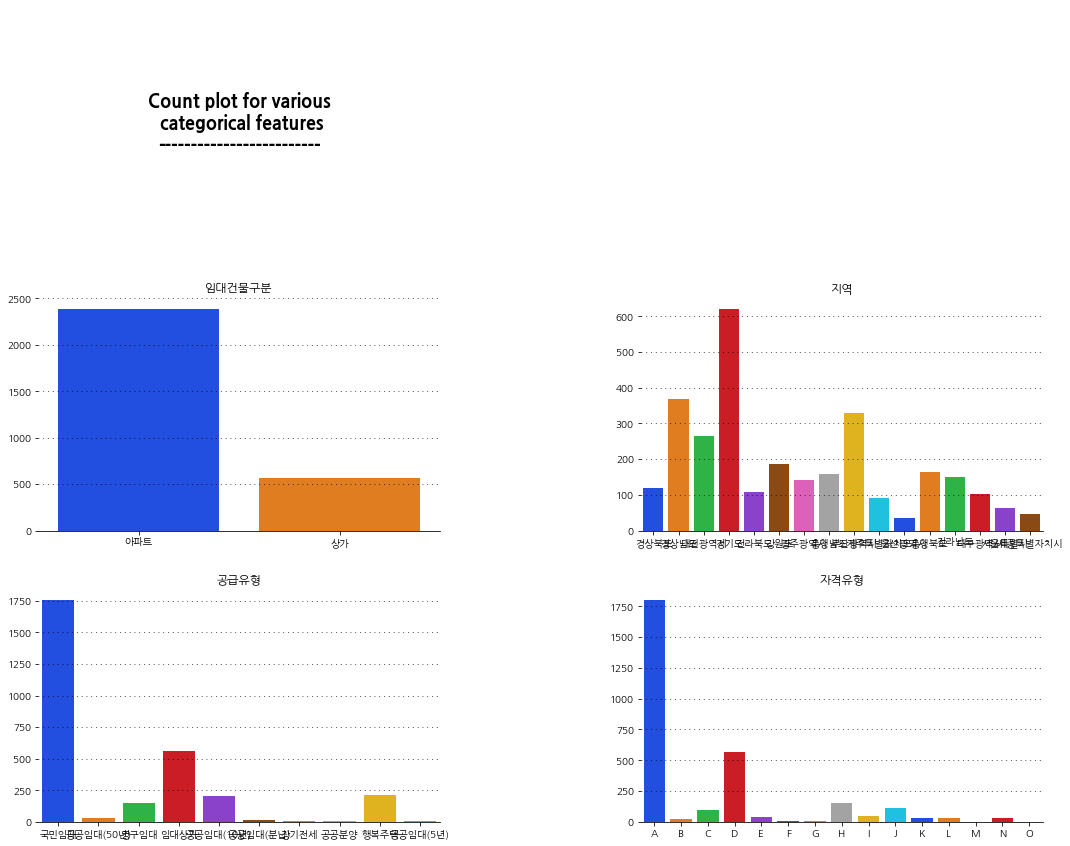

In [7]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, 'Count plot for various\n categorical features\n-------------------------',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='NanumGothic', color='#000000')

ax1.set_title('임대건물구분')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=train, x='임대건물구분', palette='bright')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.set_title('지역')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2, data=train, x='지역', palette='bright')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.set_title('공급유형')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=train, x='공급유형', palette='bright')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.set_title('자격유형')
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4, data=train, x='자격유형', palette='bright')
ax4.set_xlabel("")
ax4.set_ylabel("")

for s in ["top", 'left', "right"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
 

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

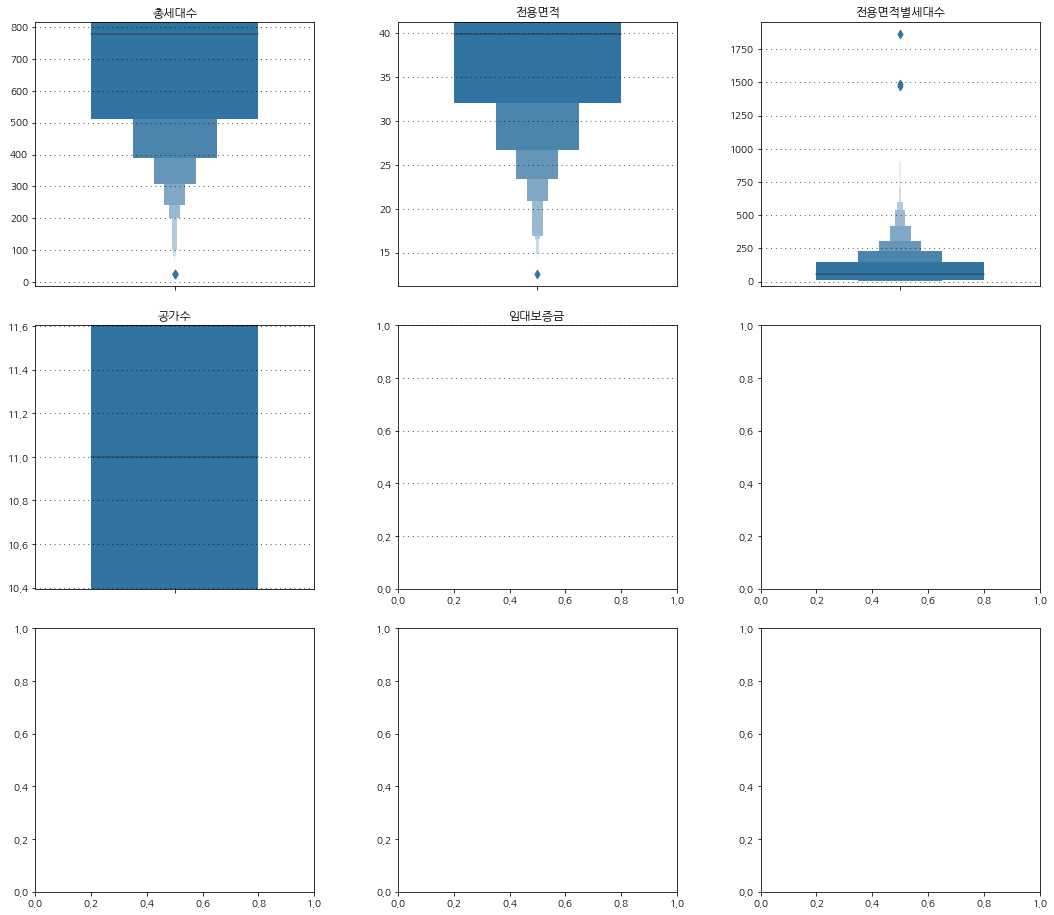

In [53]:
#continious_variable = ["총세대수", "전용면적", "전용면적별세대수", "공가수", "임대보증금", "임대료",
#                      "도보 10분거리 내 지하철역 수(환승노선 수 반영)", "도보 10분거리 내 버스정류장 수",
#                      "단지내주차면수"]


fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])
ax9 = fig.add_subplot(gs[2,2])

ax1.set_title('총세대수')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=train['총세대수'],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.set_title('전용면적')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=train['전용면적'],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.set_title('전용면적별세대수')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=train['전용면적별세대수'],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.set_title('공가수')
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=train['공가수'],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.set_title('임대보증금')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=train['임대보증금'],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.set_title('임대료')
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=train['임대료'],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.set_title('도보 10분거리 내 지하철역 수(환승노선 수 반영)')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.set_title('도보 10분거리 내 버스정류장 수')
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=train['도보 10분거리 내 버스정류장 수'],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.set_title('단지내주차면수')
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9,y=train['단지내주차면수'],width=0.6)
ax9.set_xlabel("")
ax9.set_ylabel("")

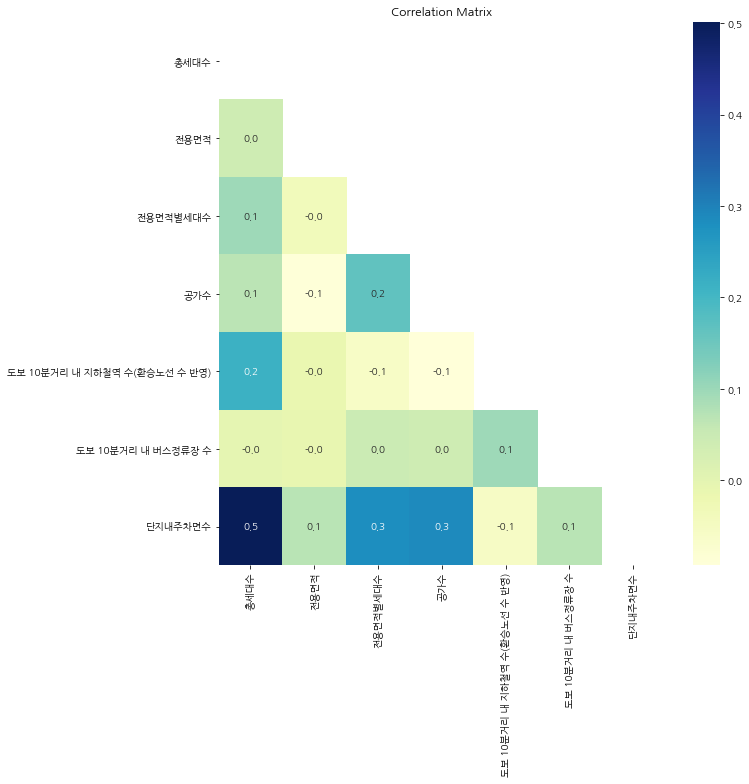

In [47]:
df_corr = train[continious_variable].corr().transpose()

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0=fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.set_title('Correlation Matrix')
sns.heatmap(df_corr, mask=mask, fmt=".1f", annot=True, cmap='YlGnBu')
plt.show()

#강한 상관관계 : 임대료 - 임대보증금
#중간 상관관계 : 단지내주차면수 - (총세대수, 전용면적별세대수, 공가수, 임대보증금, 임대료)


In [104]:
df = train
duplicate_columns = ['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
                    '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']
different_columns = ['임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']

df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수
0,C2483,900,아파트,경상북도,국민임대,39.72,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,149
1,C2483,900,아파트,경상북도,국민임대,51.93,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,441
2,C2483,900,아파트,경상북도,국민임대,51.95,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,224
3,C2483,900,아파트,경상북도,국민임대,59.88,38.0,A,30357000,214270,0.0,3.0,1425.0,1015.0,86
4,C2515,545,아파트,경상남도,국민임대,33.48,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,C2532,239,아파트,강원도,국민임대,49.20,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,19
1574,C2532,239,아파트,강원도,국민임대,51.08,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,34
1575,C2532,239,아파트,강원도,국민임대,51.73,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,34
1576,C2532,239,아파트,강원도,국민임대,51.96,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,114


In [11]:
from sklearn.preprocessing import RobustScaler


def pre_processing(x):
    x = x.fillna(0)
    x.loc[x['임대료'] == '-', ['임대료']] = 0
    x.loc[x['임대보증금'] == '-', ['임대보증금']] = 0
    x[['임대료', '임대보증금']] = x[['임대료', '임대보증금']].astype('int64')
    x.isnull().sum()
    
    x = pd.get_dummies(x, columns=categorial_variable)
    scaler = RobustScaler()
    x[continious_variable] = scaler.fit_transform(x[continious_variable])
    return x

def get_removed_code(df):
    return df.drop('단지코드', axis=1)

In [12]:
df = train
differ_variables = ['공급유형_공공임대(5년)','공급유형_공공임대(10년)', '자격유형_B', '자격유형_F', '자격유형_O',
                    '지역_서울특별시', '공급유형_공공분양', '공급유형_장기전세']

X_train = pre_processing(df.drop(['등록차량수'], axis=1))
y_train = df[['단지코드','등록차량수']]
if len(test[test['자격유형'].isnull() == True]) > 0:
    test.loc[test['자격유형'].isnull() == True, ['자격유형']] = ('A','C')
X_test = pre_processing(test)
for c in differ_variables:
    X_test[c] = 0
id_code_train = train['단지코드']
id_code_test = test['단지코드']

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import sklearn

rfr = RandomForestRegressor(n_estimators=200, max_depth=25, min_samples_leaf=1, 
                            min_samples_split=4, random_state=93)
model = rfr

train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.2, random_state=93)

grouped = test_y.groupby(test_y['단지코드'])
test_y_unique = grouped.agg(lambda x:x.value_counts().index[0])

model.fit(get_removed_code(train_X), get_removed_code(train_y))
pred = model.predict(get_removed_code(test_X))
test_result = pd.DataFrame(test_X['단지코드'])
test_result['등록차량수'] = pred
test_practice = test_result.groupby(test_result['단지코드']).agg(lambda x: x.value_counts().index[0])
mean_absolute_error(test_y_unique, test_practice)

21.68980506964768

In [17]:
cv_score = cross_val_score(rfr, get_removed_code(X_train), get_removed_code(y_train), cv=5, n_jobs=-1, scoring='r2')
np.mean(cv_score)

0.6166985608585197

In [21]:
params = {
    'n_estimators':[200],
    'max_depth':[25],
    'min_samples_leaf':[1],
    'min_samples_split':[4]
}

grid = GridSearchCV(rfr, param_grid=params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(train_X.drop('단지코드',axis=1), train_y.drop('단지코드',axis=1))
print(grid.best_params_, grid.best_score_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200} -26.821980330010195


In [24]:
model.fit(X_train.drop('단지코드',axis=1), y_train.drop('단지코드',axis=1))
pred = model.predict(X_test.drop('단지코드',axis=1))
test_result = pd.DataFrame(X_test['단지코드'])
test_result['등록차량수'] = pred
group_test = test_result.groupby(test_result['단지코드'])
test_x_unique = group_test.agg(lambda x:x.value_counts().index[0])
# accuracy = mean_absolute_error(test_y_unique, test_x_unique)
# accuracy
result = pd.DataFrame(pd.unique(id_code_test))
result = result.merge(test_x_unique, left_on=0, right_on='단지코드')
result.columns = ['code','num']
result.to_csv('./result/result3_3.csv', index=False)
# test_x_unique
# gbr: 72.57647194273466
# rfr: 19.73668358714044
# {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100} -62.07652539964124
result


,code,num
0,C1072,773.922530
1,C1128,1799.255000
2,C1456,608.354954
3,C1840,447.333463
4,C1332,967.756563
...,...,...
145,C2456,244.738238
146,C1266,573.204210
147,C2152,24.937583
148,C1267,380.914052
